# Lab | Imbalanced data

1. Load the dataset and explore the variables.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [4]:
data = pd.read_csv('files_for_lab/customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`, `MonthlyCharges`.

In [6]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: >

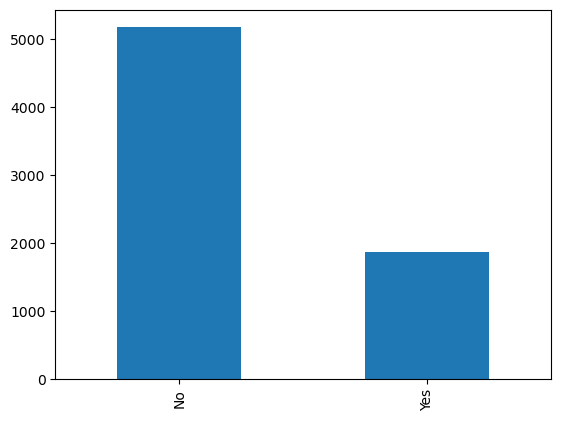

In [40]:
churn_count = data['Churn'].value_counts()
churn_count.plot(kind = 'bar')

In [9]:
data.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [10]:
data.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [16]:
# X-y split
X = data[['tenure','SeniorCitizen','MonthlyCharges']]
y = data['Churn'] 

In [22]:
X.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
dtype: object

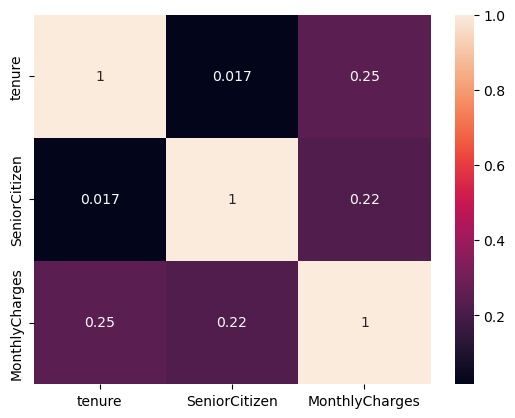

In [19]:
# check colinearity amongst X feats
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

Our features are independent from each other.

In [23]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# Scaling X data - normalising training set
transformer = MinMaxScaler().fit(X_train) # X is already entirely numerical

X_train_normalized = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train.columns)

X_train_norm

,tenure,SeniorCitizen,MonthlyCharges
0,0.722222,0.0,0.409950
1,0.013889,0.0,0.323383
2,0.125000,0.0,0.515423
3,1.000000,0.0,0.011443
4,0.013889,0.0,0.514925
...,...,...,...
5629,0.638889,0.0,0.009453
5630,0.972222,0.0,0.962189
5631,0.347222,0.0,0.019403
5632,0.986111,0.0,0.067662


In [33]:
# Scaling X data - normalising testing set
X_test_norm = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_test_norm

,tenure,SeniorCitizen,MonthlyCharges
0,0.291667,0.0,0.272637
1,0.055556,0.0,0.604478
2,0.388889,0.0,0.362189
3,0.194444,0.0,0.469652
4,0.708333,0.0,0.312438
...,...,...,...
1404,0.861111,0.0,0.534826
1405,0.652778,0.0,0.014925
1406,0.916667,0.0,0.022886
1407,0.791667,0.0,0.362189


In [ ]:
## Scaling X data - standardising (try if model is too horrible with normalisation)
# transformer = StandardScaler().fit(X_train)
# X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

# # because this is the only tranformation we apply to the numerics, 
# # we can immediately transform the X_test as well
# X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)

In [27]:
# check whether index was reset on transformation to concat
y_train.head()

5106     No
5485     No
472      No
109      No
4640    Yes
Name: Churn, dtype: object

In [29]:
# reset index to match X_train
y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) # just in case
y_train.head()

0     No
1     No
2     No
3     No
4    Yes
Name: Churn, dtype: object

4. Build the logistic regression model.

In [30]:
# build logistic regression model classification
classification = LogisticRegression(random_state=0, solver='lbfgs')
classification.fit(X_train_norm, y_train)

LogisticRegression(random_state=0)

In [32]:
classification.predict_proba(X_train_norm)

array([[0.94090918, 0.05909082],
       [0.57097957, 0.42902043],
       [0.52929203, 0.47070797],
       ...,
       [0.92631388, 0.07368612],
       [0.99233364, 0.00766636],
       [0.4283736 , 0.5716264 ]])

5. Evaluate the model.

In [34]:
classification.score(X_test_norm, y_test)

0.7693399574166075

In [37]:
pred = classification.predict(X_test_norm)

print("precision: ",precision_score(y_test, pred, pos_label='Yes'))          # percentage of how many correct predictions we got 
print("recall: ",recall_score(y_test, pred, pos_label='Yes'))                # looks at actual churn that we predicted being yes
print("f1: ",f1_score(y_test, pred, pos_label='Yes'))    

precision:  0.616600790513834
recall:  0.40625
f1:  0.4897959183673469


In [41]:
confusion_matrix(y_test,pred) # very good at saying No, not that good at saying Yes

array([[928,  97],
       [228, 156]])

6. Even a simple model will give us more than 70% accuracy. Why?

Our recall percentage is very low, our model aligns severely with the 'No' result in churn. While our model has a score of almost 77% accuracy, with such imbalanced target to predict, it will align more towards the majority class, biasing our results and its' ability to predict 'Yes'.

7. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [42]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_norm,y_train)

In [43]:
smote_class = LogisticRegression(random_state=0, solver='lbfgs')
smote_class.fit(X_train_SMOTE, y_train_SMOTE)
pred = smote_class.predict(X_test_norm)

print("SMOTE precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("SMOTE recall: ",recall_score(y_test,pred, pos_label='Yes'))                                
print("SMOTE f1: ",f1_score(y_test,pred, pos_label='Yes'))

SMOTE precision:  0.49295774647887325
SMOTE recall:  0.7291666666666666
SMOTE f1:  0.5882352941176471


Our SMOTE sampling improved the recall over 30%! That's a huge boost. 

8. <b> BONUS: </b> try it with either oversampling or undersampling to compare results.

In [45]:
train = pd.concat([X_train_norm, y_train], axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.722222,0.0,0.409950,No
1,0.013889,0.0,0.323383,No
2,0.125000,0.0,0.515423,No
3,1.000000,0.0,0.011443,No
4,0.013889,0.0,0.514925,Yes


In [46]:
# oversampling
no_churn = train[train['Churn'] == 'No']
yes_churn = train[train['Churn'] == 'Yes']

display(no_churn.shape)
display(yes_churn.shape)

(4149, 4)

(1485, 4)

In [47]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, 
                                replace=True, 
                                n_samples = len(no_churn),
                                random_state=0)

In [48]:
# display both sets to confirm same size
display(no_churn.shape)
display(yes_churn_oversampled.shape)
yes_churn_oversampled.head(20)

(4149, 4)

(4149, 4)

,tenure,SeniorCitizen,MonthlyCharges,Churn
2535,0.236111,0.0,0.757711,Yes
2068,0.750000,0.0,0.516418,Yes
4575,0.069444,0.0,0.514428,Yes
3063,0.305556,0.0,0.760697,Yes
2835,0.083333,0.0,0.295522,Yes
5222,0.069444,0.0,0.778607,Yes
3865,0.763889,1.0,0.813433,Yes
1011,0.986111,0.0,0.309453,Yes
2231,0.652778,0.0,0.921393,Yes
4114,0.527778,0.0,0.863184,Yes


In [49]:
# join to get our y_train together
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
# REMEMBER: there are duplicates but different row ids, so no overlap happening - that means no need to reset index
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.722222,0.0,0.409950,No
1,0.013889,0.0,0.323383,No
2,0.125000,0.0,0.515423,No
3,1.000000,0.0,0.011443,No
5,0.833333,1.0,0.532338,No


In [50]:
# set our X_train and y_train after oversampling, ready for LR
y_train_over = train_oversampled['Churn']
X_train_over = train_oversampled.drop('Churn',axis = 1)

In [52]:
class_over = LogisticRegression(random_state=0, solver='lbfgs')
class_over.fit(X_train_over, y_train_over)
pred = class_over.predict(X_test_norm)

print("Oversampling precision: ",precision_score(y_test,pred,pos_label='Yes'))                            
print("Oversampling recall: ",recall_score(y_test,pred,pos_label='Yes'))                                  
print("Oversampling f1: ",f1_score(y_test,pred,pos_label='Yes'))

Oversampling precision:  0.49734513274336284
Oversampling recall:  0.7317708333333334
Oversampling f1:  0.5922023182297155


In [53]:
confusion_matrix(y_test,pred)

array([[741, 284],
       [103, 281]])

Oversampling very sligtly improves the recall we got from the SMOTE, but not by much.

In [55]:
# undersample
no_churn_undersampled = resample(no_churn, 
                                replace=False, 
                                n_samples = len(yes_churn),
                                random_state=0)

In [56]:
# confirm size
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1485, 4)

(1485, 4)

In [57]:
train_undersampled = pd.concat([yes_churn,no_churn_undersampled], axis=0)
train_undersampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
4,0.013889,0.0,0.514925,Yes
6,0.069444,0.0,0.570149,Yes
8,0.888889,1.0,0.516915,Yes
32,0.722222,0.0,0.863184,Yes
34,0.750000,0.0,0.910448,Yes


In [58]:
y_train_under = train_undersampled['Churn']
X_train_under = train_undersampled.drop('Churn',axis = 1)

In [59]:
class_under = LogisticRegression(random_state=0, solver='lbfgs')
class_under.fit(X_train_under, y_train_under)
pred = class_under.predict(X_test_norm)

print("Undersample precision: ",precision_score(y_test,pred,pos_label='Yes'))
print("Undersample recall: ",recall_score(y_test,pred,pos_label='Yes'))
print("Undersample f1: ",f1_score(y_test,pred,pos_label='Yes'))

Undersample precision:  0.4937833037300178
Undersample recall:  0.7239583333333334
Undersample f1:  0.587117212249208


In [60]:
confusion_matrix(y_test,pred)

array([[740, 285],
       [106, 278]])

With undersampling we see some slight changes in the model's ability to correctly predict 'Yes' values, and a decreased recall percentage -- even if by very little.